# Plot Synoptic Simulated Flux Maps
Extrapolate magnetic fields and trace fieldlines from simulated flux maps. We need to convert the `.sav` files to synoptic maps, convert those synoptic maps to helioproject maps, and then extrapolate fields from those converted maps and trace fieldlines through them.

In [13]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
import synthesizAR
import astropy.units as u

from sav_converter import sav_to_map

%matplotlib inline

We have four different flux maps we want to look at:
* maximum
* declining phase
* minimum
* rising phase

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:275: Warning: Missing metadata for observation time. Using current time.
  w2.wcs.dateobs = self.date.isoformat()
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:632: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:610: Warning: Missing metadata for observation time. Using current time.
  heliographic_latitude = get_sun_B0(self.date)
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:634: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  radius=self.dsun,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:432: Warning: Missing metadata for observation time.

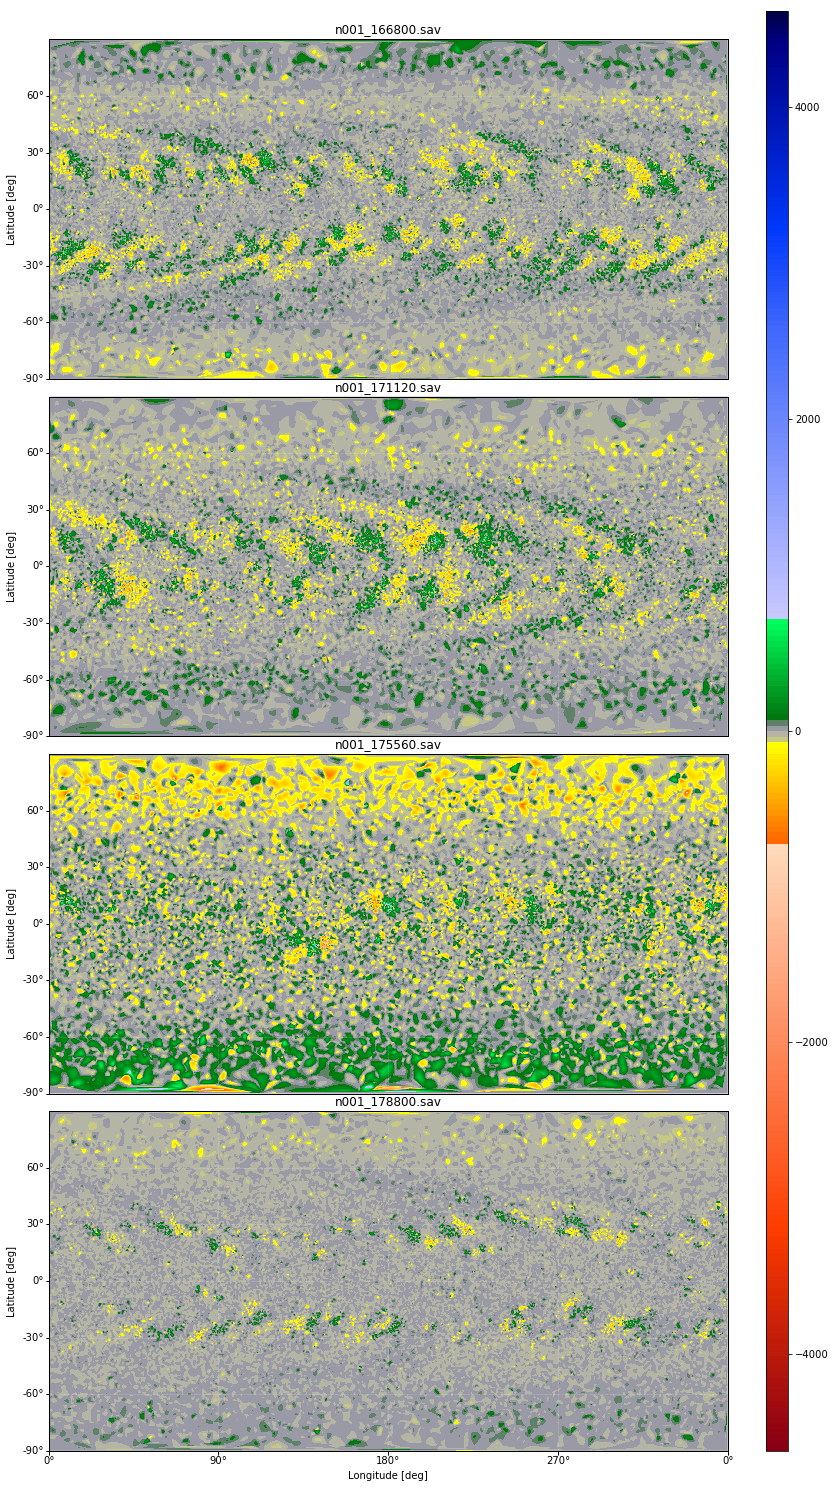

In [21]:
fig = plt.figure(figsize=(15,20))
cax=fig.add_axes((0.85,0.01,0.02,1.))
for i,f in enumerate(glob.glob('/Users/willbarnes/Downloads/n*.sav')):
    syn_map = sav_to_map(f)
    axes = fig.add_subplot(4,1,i+1,projection=syn_map)
    im = syn_map.plot(axes=axes,title=False,annotate=False)
    # Formatting
    x = axes.coords[0]
    y = axes.coords[1]
    x.set_coord_type('longitude', coord_wrap=360.)
    y.set_coord_type('latitude')
    x.set_major_formatter('dd')
    y.set_major_formatter('dd')
    if i==3:
        x.set_axislabel("Longitude [deg]")
    y.set_axislabel("Latitude [deg]")
    if i==3:
        x.set_ticks(color='black', exclude_overlapping=True)
    else:
        x.set_ticks_visible(False)
        x.set_ticklabel_visible(False)
    y.set_ticks(color='black', exclude_overlapping=True)
    axes.set_title(os.path.basename(f))
    #plt.colorbar(im)
plt.tight_layout()
fig.colorbar(im,cax=cax)